San Francisco Fire Analysis

**Author: Martin Munoz**

This project analyzes the San Francisco fire incidents dataset. The goal is to clean, explore, store, and visualize the information to extract temporal patterns and generate relevant insights for emergency management.

In [ ]:
!pip install pandas numpy matplotlib jupyter notebook


In [ ]:
import pandas as pd


url = "https://data.sfgov.org/api/views/wr8u-xric/rows.csv?accessType=DOWNLOAD"


df = pd.read_csv(url, low_memory=False, dtype=str)

print("Shape:", df.shape)
df.head()



Shape: (704830, 66)


,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,...,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,neighborhood_district,point,data_as_of,data_loaded_at
0,20133569,0,201335690,1904 DIVISADERO STREET,2020/11/22,203270436,2020/11/22 06:15:57 AM,2020/11/22 06:19:49 AM,2020/11/22 06:24:56 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,2,Pacific Heights,POINT (-122.440186 37.787223),2020/11/22 06:24:56 AM,2025/05/21 02:20:33 AM
1,20133579,0,201335790,SOUTH VAN NESS AVENUE,2020/11/22,203270510,2020/11/22 07:22:00 AM,2020/11/22 07:26:33 AM,2020/11/22 07:52:24 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,9,Mission,POINT (-122.416569 37.755569),2020/11/22 07:52:24 AM,2025/05/21 02:20:33 AM
2,20133585,0,201335850,615 THE EMBARCADERO SOU,2020/11/22,203270551,2020/11/22 07:56:44 AM,2020/11/22 08:01:32 AM,2020/11/22 08:06:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6,Financial District/South Beach,POINT (-122.387744 37.784284),2020/11/22 08:06:15 AM,2025/05/21 02:20:33 AM
3,20133586,0,201335860,929 MARKET STREET,2020/11/22,203270552,2020/11/22 07:58:02 AM,2020/11/22 08:02:51 AM,2020/11/22 08:17:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6,South of Market,POINT (-122.408513 37.783541),2020/11/22 08:17:15 AM,2025/05/21 02:20:33 AM
4,20133598,0,201335980,336 OFARRELL STREET,2020/11/22,203270619,2020/11/22 08:37:03 AM,2020/11/22 08:42:28 AM,2020/11/22 09:20:16 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,3,Tenderloin,POINT (-122.410326 37.786193),2020/11/22 09:20:16 AM,2025/05/21 02:20:33 AM


In [ ]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704830 entries, 0 to 704829
Data columns (total 66 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Incident Number                               704830 non-null  int64  
 1   Exposure Number                               704830 non-null  int64  
 2   ID                                            704830 non-null  int64  
 3   Address                                       704515 non-null  object 
 4   Incident Date                                 704830 non-null  object 
 5   Call Number                                   704830 non-null  int64  
 6   Alarm DtTm                                    704829 non-null  object 
 7   Arrival DtTm                                  704754 non-null  object 
 8   Close DtTm                                    704815 non-null  object 
 9   City                                          70

Index(['Incident Number', 'Exposure Number', 'ID', 'Address', 'Incident Date',
       'Call Number', 'Alarm DtTm', 'Arrival DtTm', 'Close DtTm', 'City',
       'zipcode', 'Battalion', 'Station Area', 'Box', 'Suppression Units',
       'Suppression Personnel', 'EMS Units', 'EMS Personnel', 'Other Units',
       'Other Personnel', 'First Unit On Scene', 'Estimated Property Loss',
       'Estimated Contents Loss', 'Fire Fatalities', 'Fire Injuries',
       'Civilian Fatalities', 'Civilian Injuries', 'Number of Alarms',
       'Primary Situation', 'Mutual Aid', 'Action Taken Primary',
       'Action Taken Secondary', 'Action Taken Other',
       'Detector Alerted Occupants', 'Property Use', 'Area of Fire Origin',
       'Ignition Cause', 'Ignition Factor Primary',
       'Ignition Factor Secondary', 'Heat Source', 'Item First Ignited',
       'Human Factors Associated with Ignition', 'Structure Type',
       'Structure Status', 'Floor of Fire Origin', 'Fire Spread',
       'No Flame Spread

In [ ]:
# Renombramos columnas para facilitar SQL y análisis
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
display(df.head())


,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,automatic_extinguishing_system_present,automatic_extinguishing_sytem_type,automatic_extinguishing_sytem_perfomance,automatic_extinguishing_sytem_failure_reason,number_of_sprinkler_heads_operating,supervisor_district,neighborhood_district,point,data_as_of,data_loaded_at
0,20133569,0,201335690,1904 DIVISADERO STREET,2020/11/22,203270436,2020/11/22 06:15:57 AM,2020/11/22 06:19:49 AM,2020/11/22 06:24:56 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,POINT (-122.440186 37.787223),2020/11/22 06:24:56 AM,2025/05/21 02:20:33 AM
1,20133579,0,201335790,SOUTH VAN NESS AVENUE,2020/11/22,203270510,2020/11/22 07:22:00 AM,2020/11/22 07:26:33 AM,2020/11/22 07:52:24 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,9.0,Mission,POINT (-122.416569 37.755569),2020/11/22 07:52:24 AM,2025/05/21 02:20:33 AM
2,20133585,0,201335850,615 THE EMBARCADERO SOU,2020/11/22,203270551,2020/11/22 07:56:44 AM,2020/11/22 08:01:32 AM,2020/11/22 08:06:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,POINT (-122.387744 37.784284),2020/11/22 08:06:15 AM,2025/05/21 02:20:33 AM
3,20133586,0,201335860,929 MARKET STREET,2020/11/22,203270552,2020/11/22 07:58:02 AM,2020/11/22 08:02:51 AM,2020/11/22 08:17:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,POINT (-122.408513 37.783541),2020/11/22 08:17:15 AM,2025/05/21 02:20:33 AM
4,20133598,0,201335980,336 OFARRELL STREET,2020/11/22,203270619,2020/11/22 08:37:03 AM,2020/11/22 08:42:28 AM,2020/11/22 09:20:16 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,3.0,Tenderloin,POINT (-122.410326 37.786193),2020/11/22 09:20:16 AM,2025/05/21 02:20:33 AM


In [ ]:
# Revisar valores nulos
print(df.isnull().sum())

# Revisar duplicados
print(df.duplicated().sum())


incident_number              0
exposure_number              0
id                           0
address                    315
incident_date                0
                         ...  
supervisor_district      11069
neighborhood_district    10875
point                      798
data_as_of                   0
data_loaded_at               0
Length: 66, dtype: int64
0


In [ ]:
import sqlite3

conn = sqlite3.connect('fire_incidents.db')
df.to_sql('fire_incidents', conn, if_exists='replace', index=False)
pd.read_sql('SELECT * FROM fire_incidents LIMIT 5', conn)
conn.close()


In [ ]:
# Elimina duplicados
df = df.drop_duplicates()

df = df.dropna(subset=['incident_date', 'incident_number'])


In [ ]:
# Revisa la estructura del DataFrame y algunas estadísticas generales
print(df.info())
print(df.describe(include='all'))
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704830 entries, 0 to 704829
Data columns (total 66 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   incident_number                               704830 non-null  int64  
 1   exposure_number                               704830 non-null  int64  
 2   id                                            704830 non-null  int64  
 3   address                                       704515 non-null  object 
 4   incident_date                                 704830 non-null  object 
 5   call_number                                   704830 non-null  int64  
 6   alarm_dttm                                    704829 non-null  object 
 7   arrival_dttm                                  704754 non-null  object 
 8   close_dttm                                    704815 non-null  object 
 9   city                                          70

Basic Visualization of **Temporal Distribution**

In [ ]:
print(df.columns.tolist())


['incident_number', 'exposure_number', 'id', 'address', 'incident_date', 'call_number', 'alarm_dttm', 'arrival_dttm', 'close_dttm', 'city', 'zipcode', 'battalion', 'station_area', 'box', 'suppression_units', 'suppression_personnel', 'ems_units', 'ems_personnel', 'other_units', 'other_personnel', 'first_unit_on_scene', 'estimated_property_loss', 'estimated_contents_loss', 'fire_fatalities', 'fire_injuries', 'civilian_fatalities', 'civilian_injuries', 'number_of_alarms', 'primary_situation', 'mutual_aid', 'action_taken_primary', 'action_taken_secondary', 'action_taken_other', 'detector_alerted_occupants', 'property_use', 'area_of_fire_origin', 'ignition_cause', 'ignition_factor_primary', 'ignition_factor_secondary', 'heat_source', 'item_first_ignited', 'human_factors_associated_with_ignition', 'structure_type', 'structure_status', 'floor_of_fire_origin', 'fire_spread', 'no_flame_spread', 'number_of_floors_with_minimum_damage', 'number_of_floors_with_significant_damage', 'number_of_floors

In [ ]:
print(df['incident_date'].notnull().sum())
print(df['incident_date'].head(10))



704830
0    2020/11/22
1    2020/11/22
2    2020/11/22
3    2020/11/22
4    2020/11/22
5    2020/11/22
6    2020/11/22
7    2020/11/22
8    2020/11/22
9    2020/11/22
Name: incident_date, dtype: object


In [ ]:
print(df['incident_date'].head(20))


0     2020/11/22
1     2020/11/22
2     2020/11/22
3     2020/11/22
4     2020/11/22
5     2020/11/22
6     2020/11/22
7     2020/11/22
8     2020/11/22
9     2020/11/22
10    2020/11/22
11    2020/11/22
12    2020/11/22
13    2020/11/22
14    2020/11/22
15    2020/11/22
16    2020/11/22
17    2020/11/22
18    2020/11/22
19    2020/11/22
Name: incident_date, dtype: object


In [ ]:
print(df.shape)
display(df.head())


(704830, 66)


,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,automatic_extinguishing_system_present,automatic_extinguishing_sytem_type,automatic_extinguishing_sytem_perfomance,automatic_extinguishing_sytem_failure_reason,number_of_sprinkler_heads_operating,supervisor_district,neighborhood_district,point,data_as_of,data_loaded_at
0,20133569,0,201335690,1904 DIVISADERO STREET,2020/11/22,203270436,2020/11/22 06:15:57 AM,2020/11/22 06:19:49 AM,2020/11/22 06:24:56 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,POINT (-122.440186 37.787223),2020/11/22 06:24:56 AM,2025/05/21 02:20:33 AM
1,20133579,0,201335790,SOUTH VAN NESS AVENUE,2020/11/22,203270510,2020/11/22 07:22:00 AM,2020/11/22 07:26:33 AM,2020/11/22 07:52:24 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,9.0,Mission,POINT (-122.416569 37.755569),2020/11/22 07:52:24 AM,2025/05/21 02:20:33 AM
2,20133585,0,201335850,615 THE EMBARCADERO SOU,2020/11/22,203270551,2020/11/22 07:56:44 AM,2020/11/22 08:01:32 AM,2020/11/22 08:06:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,POINT (-122.387744 37.784284),2020/11/22 08:06:15 AM,2025/05/21 02:20:33 AM
3,20133586,0,201335860,929 MARKET STREET,2020/11/22,203270552,2020/11/22 07:58:02 AM,2020/11/22 08:02:51 AM,2020/11/22 08:17:15 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,POINT (-122.408513 37.783541),2020/11/22 08:17:15 AM,2025/05/21 02:20:33 AM
4,20133598,0,201335980,336 OFARRELL STREET,2020/11/22,203270619,2020/11/22 08:37:03 AM,2020/11/22 08:42:28 AM,2020/11/22 09:20:16 AM,San Francisco,...,NaN,NaN,NaN,NaN,NaN,3.0,Tenderloin,POINT (-122.410326 37.786193),2020/11/22 09:20:16 AM,2025/05/21 02:20:33 AM


In [ ]:
df = df.dropna(subset=['incident_date'])


Convert the **date** column




In [ ]:
df['incident_date'] = pd.to_datetime(df['incident_date'])


In [ ]:
print(df['incident_date'].notnull().sum())
display(df['incident_date'].head())


704830


,incident_date
0,2020-11-22
1,2020-11-22
2,2020-11-22
3,2020-11-22
4,2020-11-22


Save to **SQLite**

In [ ]:
import sqlite3

conn = sqlite3.connect('fire_incidents.db')
df.to_sql('fire_incidents', conn, if_exists='replace', index=False)


704830

In [ ]:
print(pd.read_sql('SELECT COUNT(*) FROM fire_incidents', conn))
print(pd.read_sql('SELECT * FROM fire_incidents LIMIT 5', conn))


   COUNT(*)
0    704830
   incident_number  exposure_number         id                  address  \
0         20133569                0  201335690   1904 DIVISADERO STREET   
1         20133579                0  201335790    SOUTH VAN NESS AVENUE   
2         20133585                0  201335850  615 THE EMBARCADERO SOU   
3         20133586                0  201335860        929 MARKET STREET   
4         20133598                0  201335980      336 OFARRELL STREET   

         incident_date  call_number              alarm_dttm  \
0  2020-11-22 00:00:00    203270436  2020/11/22 06:15:57 AM   
1  2020-11-22 00:00:00    203270510  2020/11/22 07:22:00 AM   
2  2020-11-22 00:00:00    203270551  2020/11/22 07:56:44 AM   
3  2020-11-22 00:00:00    203270552  2020/11/22 07:58:02 AM   
4  2020-11-22 00:00:00    203270619  2020/11/22 08:37:03 AM   

             arrival_dttm              close_dttm           city  ...  \
0  2020/11/22 06:19:49 AM  2020/11/22 06:24:56 AM  San Francisco  ...   


1. Number of incidents per year




In [ ]:
query = """
SELECT strftime('%Y', incident_date) AS year, COUNT(*) AS cantidad
FROM fire_incidents
GROUP BY year
ORDER BY year
"""
print(pd.read_sql(query, conn))


    year  cantidad
0   2003     32829
1   2004     29015
2   2005     27226
3   2006     27215
4   2007     30342
5   2008     29811
6   2009     30181
7   2010     31217
8   2011     31303
9   2012     31831
10  2013     30556
11  2014     26322
12  2015     31723
13  2016     32252
14  2017     32323
15  2018     32729
16  2019     33355
17  2020     29918
18  2021     31351
19  2022     34771
20  2023     37475
21  2024     38127
22  2025     12958


2. Top 10 neighborhoods with the most incidents

In [ ]:
query = """
SELECT neighborhood_district, COUNT(*) AS cantidad
FROM fire_incidents
GROUP BY neighborhood_district
ORDER BY cantidad DESC
LIMIT 10
"""
print(pd.read_sql(query, conn))


            neighborhood_district  cantidad
0                      Tenderloin     65093
1                         Mission     62621
2  Financial District/South Beach     54191
3                 South of Market     52999
4           Bayview Hunters Point     39553
5                Western Addition     28795
6                 Sunset/Parkside     26512
7                        Nob Hill     24261
8                 Pacific Heights     19399
9                    Hayes Valley     18454


3. Promedio de pérdidas materiales por año

In [ ]:
query = """
SELECT strftime('%Y', incident_date) AS year, AVG(estimated_property_loss) AS promedio_perdida
FROM fire_incidents
WHERE estimated_property_loss IS NOT NULL
GROUP BY year
ORDER BY year
"""
print(pd.read_sql(query, conn))


    year  promedio_perdida
0   2003        163.428402
1   2004       1064.145580
2   2005       1237.513590
3   2006       1422.995113
4   2007      93469.005529
5   2008      21246.920335
6   2009      18720.757460
7   2010      31031.206818
8   2011      42966.679904
9   2012      42096.986023
10  2013      29470.042724
11  2014      58077.248654
12  2015      24621.346210
13  2016      20034.705935
14  2017      25526.945872
15  2018      69955.595074
16  2019      41071.984954
17  2020     143948.181460
18  2021      63979.012658
19  2022      77629.331367
20  2023      94867.295940
21  2024      34524.128767
22  2025      21715.541039


3. Number of fatalities per year

In [ ]:
query = """
SELECT strftime('%Y', incident_date) as year, SUM(fire_fatalities + civilian_fatalities) as total_fatalities
FROM fire_incidents
GROUP BY year
ORDER BY year
"""
print(pd.read_sql(query, conn))


    year  total_fatalities
0   2003                 0
1   2004                 1
2   2005                 5
3   2006                 3
4   2007                 3
5   2008                 0
6   2009                 2
7   2010                 2
8   2011                 5
9   2012                 2
10  2013                 1
11  2014                 1
12  2015                 0
13  2016                 1
14  2017                 3
15  2018                 2
16  2019                 4
17  2020                 3
18  2021                 1
19  2022                 0
20  2023                 3
21  2024                 1
22  2025                 0


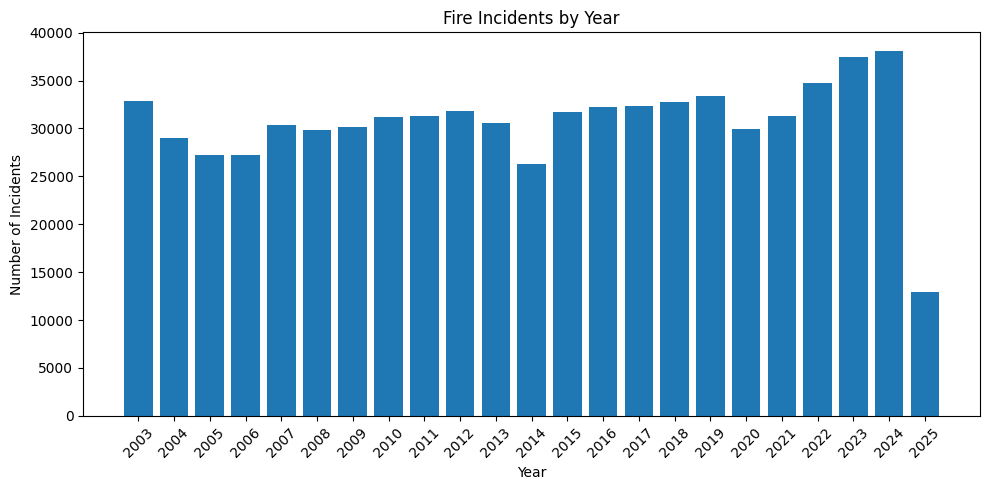

In [ ]:
import matplotlib.pyplot as plt

incidentes = pd.read_sql("""
SELECT strftime('%Y', incident_date) as year, COUNT(*) as cantidad
FROM fire_incidents
GROUP BY year
ORDER BY year
""", conn)

plt.figure(figsize=(10, 5))
plt.bar(incidentes['year'], incidentes['cantidad'])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Fire Incidents by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Neighborhoods with the **most incidents**

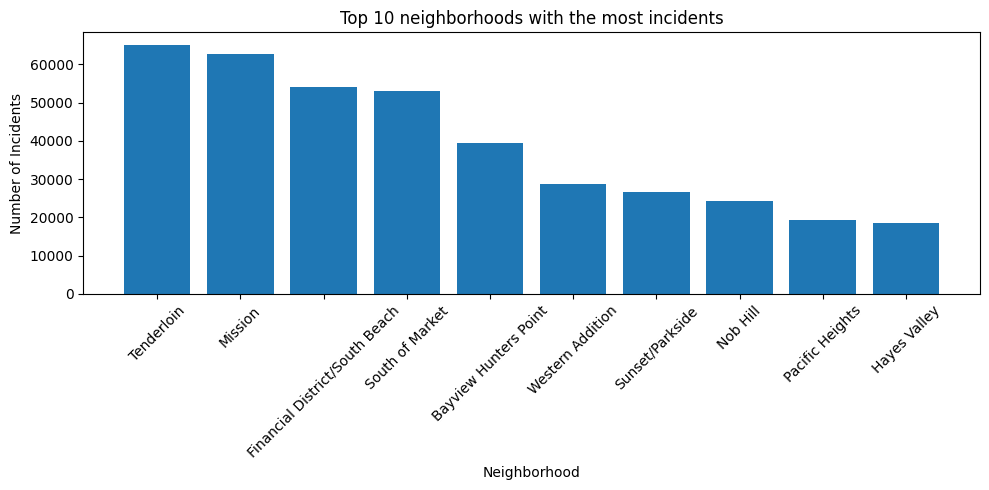

In [ ]:
top_barrios = pd.read_sql("""
SELECT neighborhood_district, COUNT(*) as cantidad
FROM fire_incidents
GROUP BY neighborhood_district
ORDER BY cantidad DESC
LIMIT 10
""", conn)

plt.figure(figsize=(10,5))
plt.bar(top_barrios['neighborhood_district'], top_barrios['cantidad'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.title('Top 10 neighborhoods with the most incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation:**

Most incidents are concentrated in the later years of the dataset, which could indicate a possible increase in the recording or occurrence of fires.

Final **Analysis**

**Conclusions:**

- The dataset contains over 700,000 records and covers several years of fire incidents.
- Null values are primarily found in secondary columns and don't impact the basic temporal analysis.
- The highest number of incidents occurred in the Tenderloin, Mission, and other neighborhoods.
- The year with the most incidents was 2024, with 38,127 reported events.
- The average material losses were highest in 2020, reaching $143,948.18.
- Fatalities remain low, but there are noticeable peaks in specific years.
- This analysis helped identify temporal and geographical trends in fire incidents, which can facilitate decision-making for prevention efforts.